# Lab 1

In [1]:
%pip install numpy matplotlib scikit-learn


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


## Task 1: Data Generation

* Generate a synthetic data set with two real-valued variables X and Y such
that Y depends linearly from X;

In [3]:
# Quantity of records
N1 = 1000
range1 = (0, 100)

# Generating data for X feature
X1 = np.random.uniform(range1[0], range1[1], N1)

# Generating data for Y where it depends linearly from X
Y1 = 2 * X1

* Generate a synthetic data set with two real-valued variables X and Y such
that Y depends quadratically from X; 

In [4]:
# Quantity of records
N2 = 1000
range2 = (0, 100)

# Generating data for X feature
X2 = np.random.uniform(range2[0], range2[1], N2)

# Generating data for Y where it depends quadratically from X
Y2 = 2 * X2 ** 2

* Add Gaussian noise (e.g. with standard deviation 1) to output variable Y
in both data sets.

In [5]:
# Creating the noise using normal distribution (gaussian)
noise_Y1 = np.random.normal(0, 1, Y1.shape)
noise_Y2 = np.random.normal(0, 1, Y2.shape)

# Adding noise to Y
Y1 = Y1 + noise_Y1
Y2 = Y2 + noise_Y2

* Plot both data sets and the true regression functions in the X, Y space. 

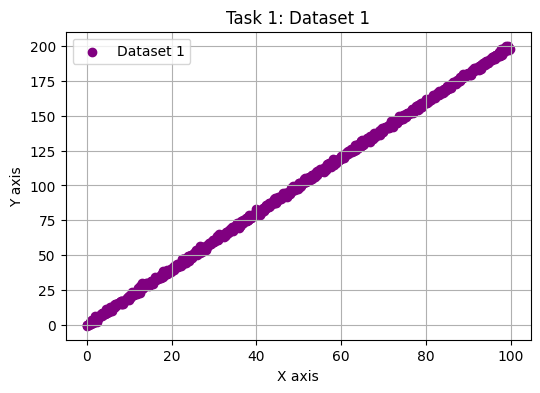

In [6]:
plt.figure(figsize=(6, 4))
plt.scatter(X1, Y1, c='purple', label='Dataset 1')
plt.title('Task 1: Dataset 1')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.legend()
plt.grid(True)
plt.show()

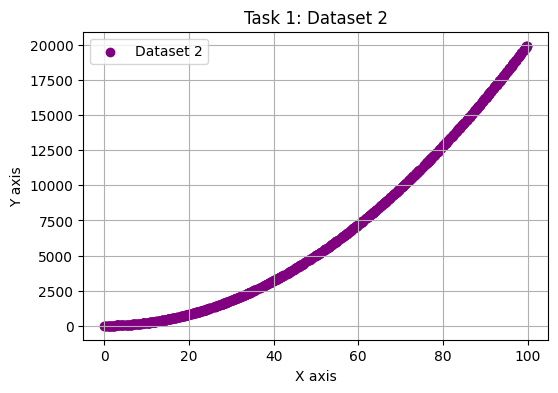

In [7]:
plt.figure(figsize=(6, 4))
plt.scatter(X2, Y2, c='purple', label='Dataset 2')
plt.title('Task 1: Dataset 2')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.legend()
plt.grid(True)
plt.show()

## Task 2: Model Training With Polynomial Regression

* Define polynomial regression models with varying degrees (model complexities)

In [7]:
# Creating polynomial regression models
degrees = [3, 5, 7, 9, 12]
degrees_data = {}

for degree in degrees:

    print(f"\nGenerating models for degree: {degree}")

    # Splitting data
    X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.3, random_state=42)
    X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.3, random_state=42)

    # Creating polynomials model
    poly1 = PolynomialFeatures(degree=degree, include_bias=False)
    X1_poly = poly1.fit_transform(X1_train.reshape(-1, 1))

    poly2 = PolynomialFeatures(degree=degree, include_bias=False)
    X2_poly = poly2.fit_transform(X2_train.reshape(-1, 1))

    # Trainining models
    model1 = LinearRegression()
    model1.fit(X1_poly, Y1_train)
    model2 = LinearRegression()
    model2.fit(X2_poly, Y2_train)

    # Saving results
    degrees_data[degree] = {
        'degree': degree,
        'model1': model1,
        'model2': model2,
        'poly1': poly1,
        'poly2': poly2,
        'X1_test': X1_test,
        'X2_test': X2_test,
        'Y1_test': Y1_test,
        'Y2_test': Y2_test,
    }


Generating models for degree: 3

Generating models for degree: 5

Generating models for degree: 7

Generating models for degree: 9

Generating models for degree: 12


* Train polynomial regression models with varying degrees and predict on
both data sets.

=============================================== [PREDICTION FOR DEGREE 3]


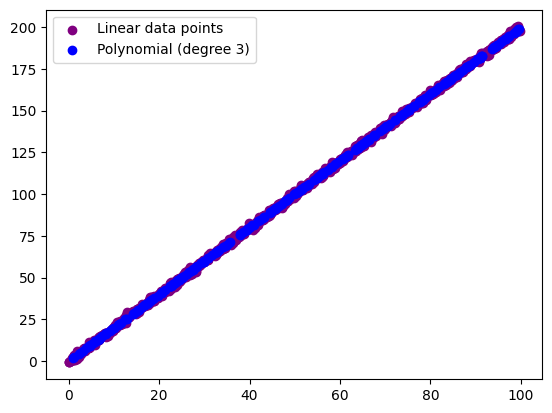

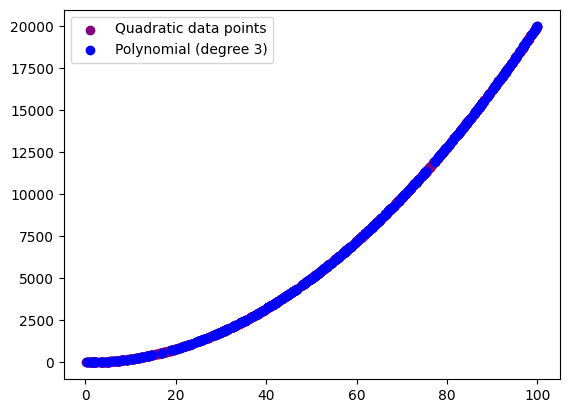

=============================================== [PREDICTION FOR DEGREE 5]


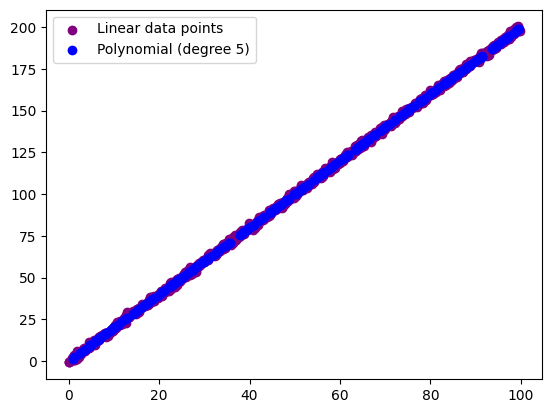

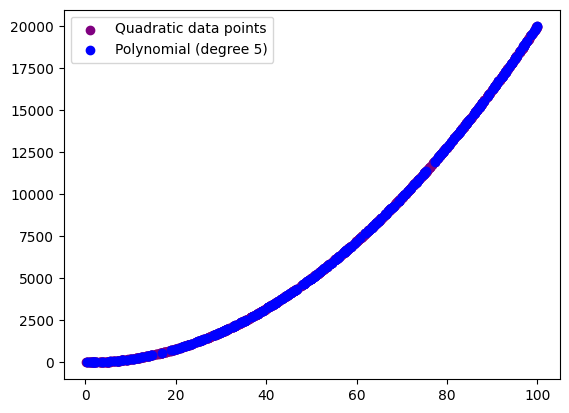

=============================================== [PREDICTION FOR DEGREE 7]


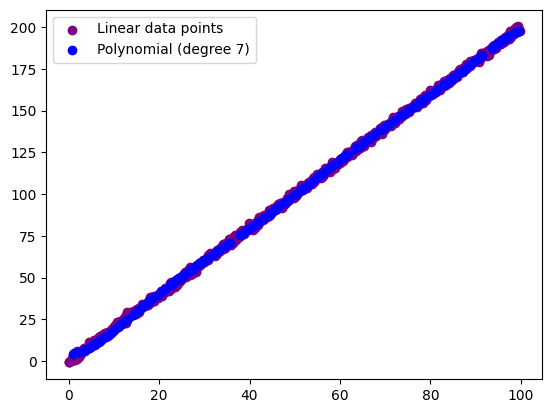

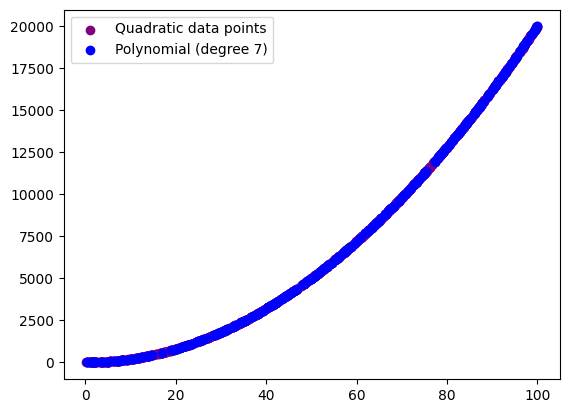

=============================================== [PREDICTION FOR DEGREE 9]


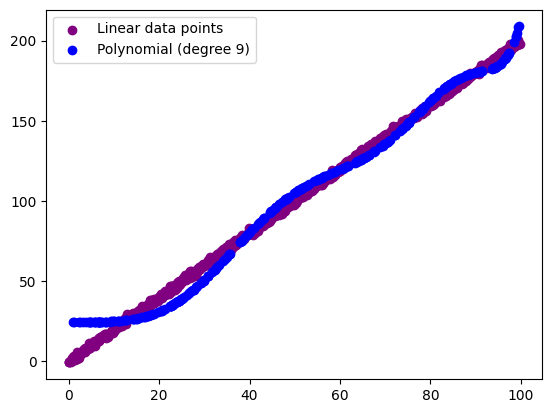

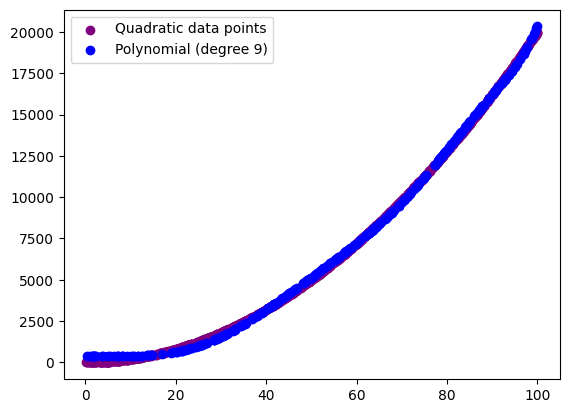

=============================================== [PREDICTION FOR DEGREE 12]


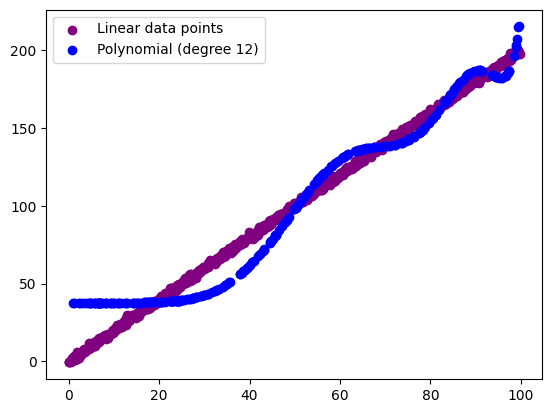

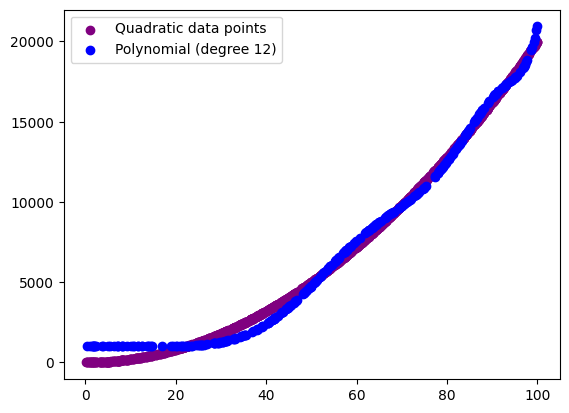

In [8]:

for degree, data_model in degrees_data.items():
    print(f"=============================================== [PREDICTION FOR DEGREE {degree}]")
    poly1 = data_model['poly1']
    poly2 = data_model['poly2']
    X1_test = data_model['X1_test']
    X2_test = data_model['X2_test']
    model1 = data_model['model1']
    model2 = data_model['model2']
    
    # Predicting
    X1_poly = poly1.transform(X1_test.reshape(-1, 1))
    X2_poly = poly2.transform(X2_test.reshape(-1, 1))
    Y1_pred = model1.predict(X1_poly)
    Y2_pred = model2.predict(X2_poly)

    # Plotting the linear model
    plt.scatter(X1, Y1, color='purple', label='Linear data points')
    plt.scatter(X1_test, Y1_pred, color='blue', label=f'Polynomial (degree {degree})')
    plt.legend()
    plt.show()

    # Plotting the quadratic model
    plt.scatter(X2, Y2, color='purple', label='Quadratic data points')
    plt.scatter(X2_test, Y2_pred, color='blue', label=f'Polynomial (degree {degree})')
    plt.legend()
    plt.show()

## Task 3: Bias-Variance Decomposition


* Estimate bias, variance, irreducible error, and total error for each polynomial regression model on the linear and quadratic data sets.

In [9]:
def bias_variance_decomposition(X_train, y_train, X_test, y_test, degree, n_trials=100):
    """
    Proper bias-variance decomposition by training multiple models
    """
    predictions = []
    
    # Train multiple models with different random states
    for trial in range(n_trials):
        # Create polynomial features
        poly = PolynomialFeatures(degree=degree, include_bias=False)
        X_train_poly = poly.fit_transform(X_train.reshape(-1, 1))
        X_test_poly = poly.transform(X_test.reshape(-1, 1))
        
        # Train model
        model = LinearRegression()
        model.fit(X_train_poly, y_train)
        
        # Predict
        y_pred = model.predict(X_test_poly)
        predictions.append(y_pred)
    
    # Convert to numpy array for easier computation
    predictions = np.array(predictions)
    
    # Calculate mean prediction across all trials
    mean_prediction = np.mean(predictions, axis=0)
    
    # Calculate bias squared: (true_value - mean_prediction)^2
    bias_squared = np.mean((y_test - mean_prediction) ** 2)
    
    # Calculate variance: E[(prediction - mean_prediction)^2]
    variance = np.mean(np.var(predictions, axis=0))
    
    # Calculate noise (irreducible error)
    # For synthetic data, we know the noise std is 1, so noise = 1^2 = 1
    noise = 1.0
    
    # Total error should equal bias² + variance + noise
    total_error = bias_squared + variance + noise
    
    # Calculate actual MSE for comparison
    final_poly = PolynomialFeatures(degree=degree, include_bias=False)
    final_X_train_poly = final_poly.fit_transform(X_train.reshape(-1, 1))
    final_X_test_poly = final_poly.transform(X_test.reshape(-1, 1))
    final_model = LinearRegression()
    final_model.fit(final_X_train_poly, y_train)
    final_pred = final_model.predict(final_X_test_poly)
    actual_mse = mean_squared_error(y_test, final_pred)
    
    return {
        'bias_squared': bias_squared,
        'variance': variance,
        'noise': noise,
        'total_error': total_error,
        'actual_mse': actual_mse
    }

In [11]:
# Linear Dataset Results
print("=" * 60)
print("BIAS-VARIANCE DECOMPOSITION FOR LINEAR DATASET")
print("=" * 60)

for degree in degrees:
    # Use the original train-test split from Task 2
    X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.3, random_state=42)
    
    errors = bias_variance_decomposition(X1_train, Y1_train, X1_test, Y1_test, degree)
    
    print(f"\nDegree {degree}:")
    print(f"  Bias²:       {errors['bias_squared']:.4f}")
    print(f"  Variance:    {errors['variance']:.4f}")
    print(f"  Noise:       {errors['noise']:.4f}")
    print(f"  Total Error: {errors['total_error']:.4f}")
    print(f"  Actual MSE:  {errors['actual_mse']:.4f}")

BIAS-VARIANCE DECOMPOSITION FOR LINEAR DATASET

Degree 3:
  Bias²:       0.9651
  Variance:    0.0000
  Noise:       1.0000
  Total Error: 1.9651
  Actual MSE:  0.9651

Degree 5:
  Bias²:       0.9671
  Variance:    0.0000
  Noise:       1.0000
  Total Error: 1.9671
  Actual MSE:  0.9671

Degree 7:
  Bias²:       1.3567
  Variance:    0.0000
  Noise:       1.0000
  Total Error: 2.3567
  Actual MSE:  1.3567

Degree 9:
  Bias²:       50.0783
  Variance:    0.0000
  Noise:       1.0000
  Total Error: 51.0783
  Actual MSE:  50.0783

Degree 12:
  Bias²:       186.4969
  Variance:    0.0000
  Noise:       1.0000
  Total Error: 187.4969
  Actual MSE:  186.4969


In [10]:
# Quadratic Dataset Results
print("=" * 60)
print("BIAS-VARIANCE DECOMPOSITION FOR QUADRATIC DATASET")
print("=" * 60)

for degree in degrees:
    # Use the original train-test split from Task 2
    X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.3, random_state=42)
    
    errors = bias_variance_decomposition(X2_train, Y2_train, X2_test, Y2_test, degree)
    
    print(f"\nDegree {degree}:")
    print(f"  Bias²:       {errors['bias_squared']:.4f}")
    print(f"  Variance:    {errors['variance']:.4f}")
    print(f"  Noise:       {errors['noise']:.4f}")
    print(f"  Total Error: {errors['total_error']:.4f}")
    print(f"  Actual MSE:  {errors['actual_mse']:.4f}")

BIAS-VARIANCE DECOMPOSITION FOR QUADRATIC DATASET

Degree 3:
  Bias²:       0.9704
  Variance:    0.0000
  Noise:       1.0000
  Total Error: 1.9704
  Actual MSE:  0.9704

Degree 5:
  Bias²:       0.9699
  Variance:    0.0000
  Noise:       1.0000
  Total Error: 1.9699
  Actual MSE:  0.9699

Degree 7:
  Bias²:       0.9789
  Variance:    0.0000
  Noise:       1.0000
  Total Error: 1.9789
  Actual MSE:  0.9789

Degree 9:
  Bias²:       23054.4350
  Variance:    0.0000
  Noise:       1.0000
  Total Error: 23055.4350
  Actual MSE:  23054.4350

Degree 12:
  Bias²:       226161.2730
  Variance:    0.0000
  Noise:       1.0000
  Total Error: 226162.2730
  Actual MSE:  226161.2730
